# Consulta empresa

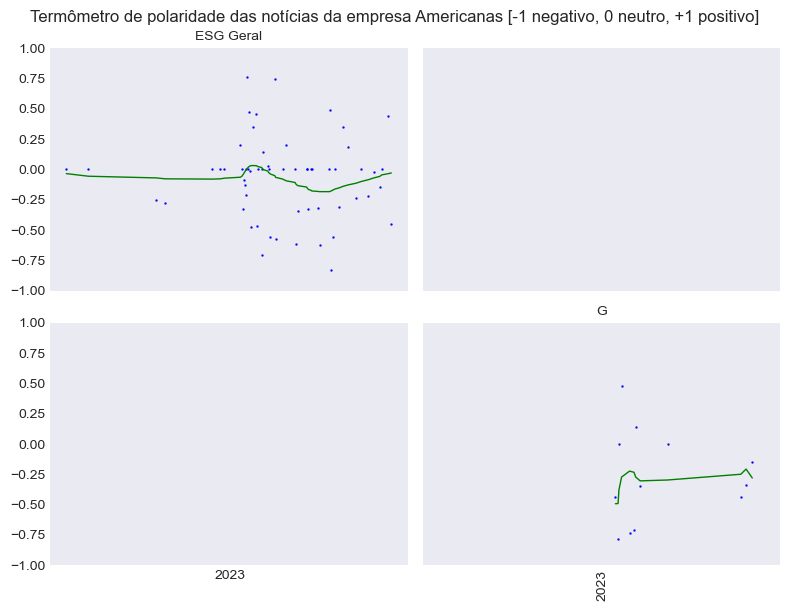

In [2]:
import warnings
import numpy as np
import pandas as pd
import datetime as dt
from noticias_google_buscador import busca_noticias_google_news
from noticias_processamento_texto import remove_acentos, remove_termos_comuns, aplica_stemming_texto, remove_palavras_texto, conta_termos_esg, classifica_texto, classifica_textos_coletados, filtra_noticias_nao_relacionadas, filtra_noticias_sem_classificacao, conta_mencoes_empresas, filtra_citacao_relevante, remove_nome_composto
from noticias_google_buscador_esg import busca_noticias_google_periodo, busca_noticias_google_esg, filtra_noticias_sites_especificos, recupera_noticias_completas, processa_busca_empresa, recupera_lista_empresas_B3
import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns
import datetime  as dt
from scipy import interpolate
import scipy.stats
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
from noticias_timeline import plota_timeline
from noticias_processamento_texto import remove_acentos, remove_termos_comuns, aplica_stemming_texto, remove_palavras_texto, conta_termos_esg, classifica_texto, classifica_textos_coletados, filtra_noticias_nao_relacionadas, filtra_noticias_sem_classificacao, conta_mencoes_empresas, filtra_citacao_relevante, trim_texto
from vaderSentimentptbr import SentimentIntensityAnalyzer 
from analise_sentimento_modelo import filtrar_noticias_pos_coleta, gera_curva_polaridade_media, pondera_polaridade_titulo_texto



warnings.filterwarnings('ignore')
arquivo_termos_esg = 'datasets/palavras_chave_esg.xlsx'
base_noticias = 'datasets/base_noticias.xlsx'

empresa = 'americanas'

df = processa_busca_empresa(empresa, recupera_lista_empresas_B3(), atualiza=True, apenas_titulos=True)

s = SentimentIntensityAnalyzer() 
df['polaridade'] = df['titulo'].apply(lambda x : s.polarity_scores(x)['compound'] )

dfPolaridade = df

# plota grafico polaridade media

plt.style.use('seaborn-dark')

ldfVisoesESG = [gera_curva_polaridade_media(df, empresa, 'ESG')]
llabelVisoesESG = ['ESG Geral']

for l in 'ESG':
    ldfVisoesESG.append( gera_curva_polaridade_media(df, empresa, l)  )
    llabelVisoesESG.append(l)
    
# plotando o gráfico com a interpolação
fig, ax = plt.subplots(2,2, figsize=(8, 6), sharex=True, sharey=True)
l = 0
for i in range(0,2):
    for j in range (0,2):
        if ldfVisoesESG[l] is not None and len(ldfVisoesESG[l]) > 0:
            ax[i,j].plot(ldfVisoesESG[l].index, ldfVisoesESG[l]['polaridade_fit'], label='Interpolação', color='green', linewidth=1)
            #ax[i,j].plot(ldfVisoesESG[l].index, ldfVisoesESG[l]['polaridade_ewma'], label='EWMA', color='black', linewidth=0.4)
            ax[i,j].scatter(ldfVisoesESG[l].index, ldfVisoesESG[l]['polaridade'], label='Ponto', s=2, color='blue', linewidth=0.2)
            # ajustando o visual do gráfico
            ax[i,j].set_title(llabelVisoesESG[l], fontsize=10)
            ax[i,j].tick_params(axis='x', labelrotation=90)
            ax[i,j].xaxis.set_major_locator(YearLocator() )
            ax[i,j].xaxis.set_major_formatter(DateFormatter('%Y'))
            ax[i,j].xaxis.set_minor_locator(MonthLocator())
        l = l+1
plt.tight_layout()
plt.ylim(-1, 1)
fig.suptitle('Termômetro de polaridade das notícias da empresa '+empresa.capitalize()+' [-1 negativo, 0 neutro, +1 positivo]', y=1.01)
plt.savefig(r'images/ewma_polaridade_empresa.png', bbox_inches='tight')
plt.show()


In [12]:
\